In [241]:
# import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [159]:
# read file

df = pd.read_csv('/Users/mac/Desktop/Data Analysis/healthcare-dataset-stroke-data.csv')
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [160]:
# check for columns 
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [161]:
# drop id column
df =df.drop(['id'], axis=1)

In [162]:
# check for null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [163]:
# drop null values in bmi 
df.dropna(inplace=True)

In [164]:
# check for duplicates
df.duplicated().sum()

0

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [198]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [166]:
df['age']= df['age'].astype(int)

In [167]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [168]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [169]:
df['ever_married'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
2       Yes
3       Yes
4       Yes
5       Yes
       ... 
5104     No
5106    Yes
5107    Yes
5108    Yes
5109    Yes
Name: ever_married, Length: 4909, dtype: object>

In [170]:
df['work_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Private
2             Private
3             Private
4       Self-employed
5             Private
            ...      
5104         children
5106    Self-employed
5107    Self-employed
5108          Private
5109         Govt_job
Name: work_type, Length: 4909, dtype: object>

In [171]:
df['stroke'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64>

In [172]:
df['age'].value_counts



<bound method IndexOpsMixin.value_counts of 0       67
2       80
3       49
4       79
5       81
        ..
5104    13
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 4909, dtype: int64>

In [173]:
m = df['age'].min()
print(m)
mi = df['age'].max()
print(mi)

0
82


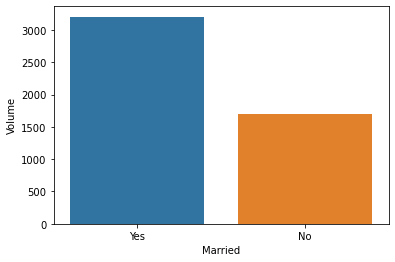

In [174]:
sns.countplot(data = df , x = df['ever_married'])
plt.xlabel('Married')
plt.ylabel('Volume')
plt.show()

In [175]:

fig= px.bar(df, x = df['age'], y=df['stroke'], width=1000 ,color='stroke', height=1000 , title='Bar chart showing Ages in relation to stroke')
fig.show()

In [176]:
ast = df.groupby(['age','stroke']).size()
print(ast)

ast.head(10)

age  stroke
0    0         42
1    0         72
2    0         55
3    0         44
4    0         34
               ..
80   1         16
81   0         46
     1         14
82   0         46
     1          9
Length: 126, dtype: int64


age  stroke
0    0         42
1    0         72
2    0         55
3    0         44
4    0         34
5    0         64
6    0         23
7    0         31
8    0         57
9    0         37
dtype: int64

In [177]:
df['Residence_type'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Urban
2       Rural
3       Urban
4       Rural
5       Urban
        ...  
5104    Rural
5106    Urban
5107    Rural
5108    Rural
5109    Urban
Name: Residence_type, Length: 4909, dtype: object>

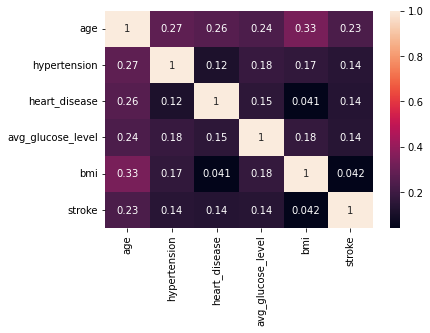

In [196]:
# correlation to select features
c = df.corr()

sns.heatmap( c , annot=True)
plt.show()


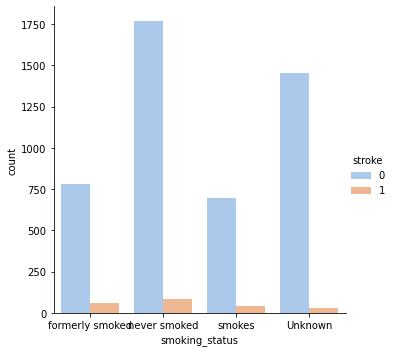

In [205]:
sns.catplot(x = 'work_type', hue='stroke', data=df, palette='pastel', kind='count')
plt.show()

<Figure size 1872x1152 with 0 Axes>

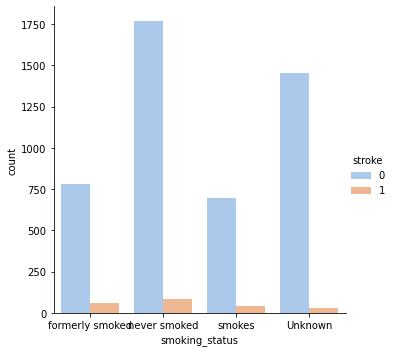

In [213]:
plt.figure(figsize=(26,16))
sns.catplot(x = 'smoking_status', hue='stroke', data=df, palette='pastel', kind='count')
plt.show()


In [218]:
# label encoding for ml training 
le = LabelEncoder()
endf= df.apply(le.fit_transform)
print(endf)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   67             0              1             1          2   
2          1   80             0              1             1          2   
3          0   49             0              0             1          2   
4          0   79             1              0             1          3   
5          1   81             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
5104       0   13             0              0             0          4   
5106       0   81             0              0             1          3   
5107       0   35             0              0             1          3   
5108       1   51             0              0             1          2   
5109       0   44             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  
0                  1        

In [222]:
x = endf.drop('stroke', axis = 1)
y = endf['stroke']

In [224]:
print(x)
print(y)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   67             0              1             1          2   
2          1   80             0              1             1          2   
3          0   49             0              0             1          2   
4          0   79             1              0             1          3   
5          1   81             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
5104       0   13             0              0             0          4   
5106       0   81             0              0             1          3   
5107       0   35             0              0             1          3   
5108       1   51             0              0             1          2   
5109       0   44             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  
0                  1               3

In [226]:
# split data into train and test data 
x_train , x_test, y_train , y_test = train_test_split( x, y,test_size = 0.6, random_state=1)

In [227]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2648,1,52,0,0,1,0,0,1533,274,3
3441,0,59,0,0,1,3,1,1685,162,3
4935,1,16,0,0,0,2,0,2048,179,2
1316,0,21,0,0,0,2,1,3069,164,2
3271,1,36,0,0,1,2,0,809,189,1
...,...,...,...,...,...,...,...,...,...,...
1485,1,53,1,0,1,3,1,3719,220,1
2010,0,78,0,0,1,2,0,1959,46,0
688,0,52,1,0,1,2,0,1176,199,2
417,0,37,0,0,1,2,1,3510,337,2


In [228]:
y_test

2648    0
3441    0
4935    0
1316    0
3271    0
       ..
1485    0
2010    0
688     0
417     0
3879    0
Name: stroke, Length: 2946, dtype: int64

In [236]:
# Using classification models
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [239]:
#make predictions
pred = model.predict(x_test)
print(pred)

[0 0 0 ... 1 0 0]


In [238]:
#  check for model score
model.score(x_test,y_test)

0.8818737270875764

In [240]:
# save predictions to csv
save = pd.DataFrame(pred)
save.index = x_test.index
save.columns=['Stroke_predictions']
save.to_csv('Stroke_results.csv')

In [242]:
df['index'] == 7

KeyError: 'index'